In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io as sio
from scipy.optimize import minimize

%matplotlib inline  

In [2]:
data = sio.loadmat('data/ex5data1.mat')
data.keys()

['ytest',
 'yval',
 '__header__',
 '__globals__',
 'Xtest',
 'Xval',
 'y',
 'X',
 '__version__']

A training set where the model will learn on: X, y

A cross validation set for determining the regularization parameter: Xval, yval

A test set for evaluating performance: Xtest, ytest

In [3]:
y = data['y']
yval = data['yval']
ytest = data['ytest']
X = np.c_[np.ones_like(data['X']), data['X']]
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]
Xtest = data['Xtest']

In [4]:
pd.DataFrame(X).describe()

,0,1
count,12.0,12.000000
mean,1.0,-5.085426
std,0.0,29.964402
min,1.0,-48.058829
25%,1.0,-30.541301
50%,1.0,-3.776152
75%,1.0,17.171532
max,1.0,37.492187


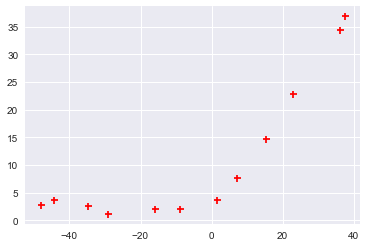

In [5]:
plt.scatter(X[:,1:],y, marker='+', c='r');

###### Cost Function
<img src="img/costFunction.png">


In [6]:
def linearRegCostFunction(theta, X, y, reg):
    m = y.size
    
    h = X.dot(theta)
    
    J = (1./(2.*m))*np.sum(np.square(h-y)) + (reg/(2.*m))*np.sum(np.square(theta[1:]))
   
    return(J)

###### Gradient Descent
<img src="img/linear_reg_reg.png">

In [7]:
def lrgradientReg(theta, X, y, reg):
    m = y.size
    
    h = X.dot(theta.reshape(-1,1))
        
    grad = (1./m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

###### Linear Regression

In [8]:
def trainLinearReg(X, y, reg):
    
    initial_theta = np.array([[15],[15]])
   
    res = minimize(linearRegCostFunction, initial_theta, args=(X,y,reg), jac=lrgradientReg)
    
    return(res)

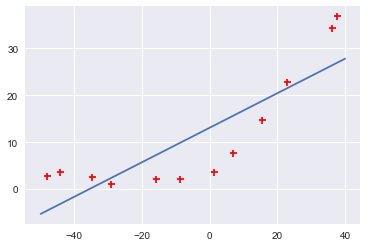

In [9]:
fit = trainLinearReg(X, y, 0).x
plt.scatter(X[:,1:],y, marker='+', c='r')
plt.plot([-50, 40], [fit[0]+fit[1]*(-50), fit[0]+fit[1]*(40)]);

In [10]:
def learningCurve(X,y):
    m = X.shape[0]
    fun = []
    fun_val = []
    for i in range(1,m+1):
        res = trainLinearReg(X[:i], y[:i], 0)
        fun.append(res.fun)
        fun_val.append(linearRegCostFunction(res.x, Xval, yval, 0))        
    plt.plot(range(1,m+1), fun, c="b")
    plt.plot(range(1,m+1), fun_val, c="r")
    plt.legend(["Training error","Testing error"])
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.show()

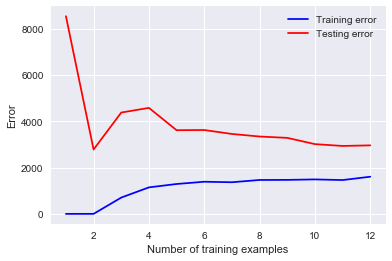

In [11]:
learningCurve(X,y)

An option using Sklearn:
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

The sklearn have a algoritm that implements the trainLinearReg()

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients.

In [12]:
from sklearn.linear_model import LinearRegression, Ridge

reg = Ridge(alpha = 0)
reg.fit(X[:,1].reshape(-1, 1),y)

reg.intercept_, reg.coef_

(array([ 13.08790351]), array([[ 0.36777923]]))

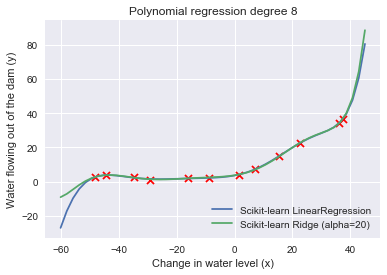

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X[:,1].reshape(-1,1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, y)

regr3 = Ridge(alpha=20)
regr3.fit(X_train_poly, y)

# plot range for x
plot_x = np.linspace(-60,45)
# using coefficients to calculate y
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plot_y2 = regr3.intercept_ + np.sum(regr3.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

plt.plot(plot_x, plot_y, label='Scikit-learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X[:,1], y, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.legend(loc=4);